# Example API usage

Try out calling some of the API examples shown below, and try changing some of the parameters to see how the response changes

In [1]:
import json
import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

## Using the `GET` method

### [The Dog API](https://thedogapi.com/)

First, we need to specify the URL of the endpoint of the API, and then any parameters we want to tell the API what to return. These are defined in the linked documentation

In [2]:
dog_url = "https://api.thedogapi.com/v1/images/search"
dog_params = {
    'api_key':'b00634cc-d3b2-4d74-9b4d-83138c87c7d7',
    'size': 'small',
    'order': 'RANDOM',
    'limit': 1,
    'format':'src'
}

We'll submit a `GET` request with our parameters:

In [3]:
dog_response = requests.get(url=dog_url,
                           params=dog_params)

Let's check the response code:

In [4]:
dog_response.status_code

200

Hopefully this was `200` ("OK") - if so, we're good to go!

In this case we're recieving a byte stream, which we can open with `io` and `PIL`

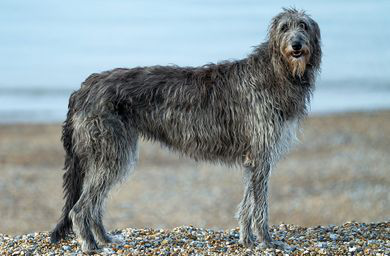

In [5]:
Image.open(BytesIO(dog_response.content))

## [Affirmations](https://www.affirmations.dev/)

No parameters for this one - just a random positive message

In [6]:
aff_response = requests.get(url='https://www.affirmations.dev/')

In this case, we'll use `requests`' inbuilt `.json()` method to get the response as a JSON object:

In [7]:
print(aff_response.json())

{'affirmation': 'You are learning valuable lessons from yourself every day'}


## [Nasa](https://api.nasa.gov/)

Again, specify the endpoint's URL and any necessary parameters

In [8]:
nasa_url = "https://api.nasa.gov/insight_weather/"
nasa_parameters = {
    "api_key":"DEMO_KEY",
    "feedtype":"json",
    "ver":1.0,
}
nasa_response = requests.get(url=nasa_url, params=nasa_parameters)
nasa_json = nasa_response.json()

This part of the response tells us which Sols (Martian days) we have data for:

In [9]:
nasa_json['sol_keys']

['641', '642', '643', '644', '645', '646', '647']

Let's get the weather in the most recent Sol:

In [10]:
weather = nasa_json[nasa_json['sol_keys'][-1]]

print(f"The most recent Sol is {nasa_json['sol_keys'][-1]}, which ran from {weather['First_UTC']} to {weather['Last_UTC']}")

# For example, here is the average temperature (in C) on the most recent Sol:
print(f"Average temperature on the most recent Sol: {weather['AT']['av']} C")

The most recent Sol is 647, which ran from 2020-09-21T00:03:54Z to 2020-09-22T00:43:28Z
Average temperature on the most recent Sol: -56.298 C


### [BreweryDB](https://www.brewerydb.com/)

The BreweryDB API provides a wealth of information about different beers and breweries, from different endpoints. 

Here, we're hitting `/beer/random` to get information on a random beer listed in their database

In [11]:
brewery_url = 'https://sandbox-api.brewerydb.com/v2/beer/random'
brewery_params = {'key':'b35a2ba22e38c6b85e1adceab0f5910b'}

brewery_response = requests.get(brewery_url, brewery_params)

print(json.dumps(brewery_response.json()['data'],indent=4))

{
    "id": "tw2Iw0",
    "name": "471 IPA. Aggressive Hoppiness",
    "nameDisplay": "471 IPA. Aggressive Hoppiness",
    "abv": "9.2",
    "ibu": "70",
    "styleId": 31,
    "isRetired": "Y",
    "status": "verified",
    "statusDisplay": "Verified",
    "createDate": "2012-01-03 02:42:37",
    "updateDate": "2018-11-02 02:15:14",
    "style": {
        "id": 31,
        "categoryId": 3,
        "category": {
            "id": 3,
            "name": "North American Origin Ales",
            "createDate": "2012-03-21 20:06:45"
        },
        "name": "Imperial or Double India Pale Ale",
        "shortName": "Imperial IPA",
        "description": "Imperial or Double India Pale Ales have intense hop bitterness, flavor and aroma. Alcohol content is medium-high to high and notably evident. They range from deep golden to medium copper in color. The style may use any variety of hops. Though the hop character is intense it's balanced with complex alcohol flavors, moderate to high fruity 

## [Numbers](http://numbersapi.com/#42)

In [12]:
NUMBER = 3
TYPE = "trivia" # one of "trivia", "math", "date", or "year"

# This API is set up slightly differently - each number has its own endpoint, 
# and there's very little to specify in the query parameters

numbers_url = f"http://numbersapi.com/{NUMBER}/{TYPE}"

numbers_params={'json':''}

numbers_response = requests.get(numbers_url, params=numbers_params)

print(numbers_response.json())

{'text': '3 is the number of semicircular canals a human ear has.', 'number': 3, 'found': True, 'type': 'trivia'}


## [Using the `POST` method](https://reqres.in/)

For example, what if we want to register a new user with a service? We could send a `POST` request with the user's details to the API, which would then create a record for the user and confirm to us that it had done so.

In [19]:
post_url = "https://reqres.in/api/users"

post_params = {
    "name": "Richard Houston",
    "job": "CEO"
}

In [20]:
post_response = requests.post(url=post_url, data=post_params)

In this case, we get a `201` response code, which represents "create" - i.e. a confirmation that the requested resource was created.

In [21]:
post_response

<Response [201]>

In [22]:
post_response.json()

{'name': 'Richard Houston',
 'job': 'CEO',
 'id': '781',
 'createdAt': '2020-09-22T21:01:24.928Z'}